(np.float64(-198.0),
 np.float64(198.00000000000014),
 np.float64(-98.68225650000004),
 np.float64(92.32738650000003))

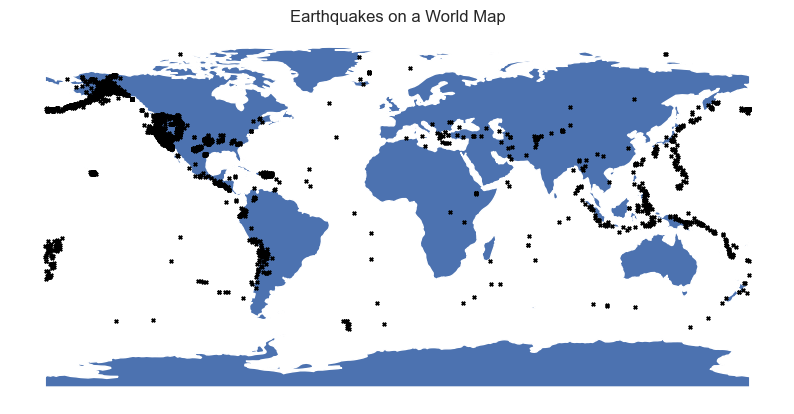

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
from geopandas import GeoSeries
import geodatasets

# getting data
df = pd.read_csv("earthquakes.csv")

# creating coordinates (POINTS)
df_geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
gdf = gpd.GeoDataFrame(df, geometry = df_geometry)

# getting world file from geodatasets and then plotting the coordinates on it
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='x', color='black', markersize=6)
plt.title("Earthquakes on a World Map")
plt.axis("off")


/var/folders/rt/462tlf2j5bsgw0jc6blrpts80000gn/T/ipykernel_22433/824445445.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.countplot(df1, x = "simple place", palette="deep")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'CA'),
  Text(1, 0, 'Alaska'),
  Text(2, 0, 'Texas'),
  Text(3, 0, 'Hawaii'),
  Text(4, 0, 'Mexico'),
  Text(5, 0, 'Nevada'),
  Text(6, 0, 'Montana'),
  Text(7, 0, 'Washington'),
  Text(8, 0, 'Oklahoma'),
  Text(9, 0, 'Peurto Rico'),
  Text(10, 0, 'Utah')])

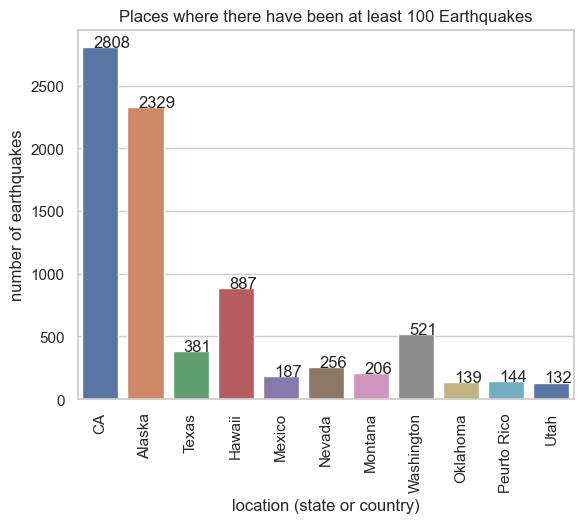

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

# setting sns theme
sns.set_theme(style="whitegrid")

# simplified place (and correcting for "Rico")
def simpleplace(input):
  result = input.split()[-1]
  if input.split()[-1] == "Rico":
    result = "Peurto Rico"
  return result
df["simple place"] = df["place"].apply(simpleplace)

# delete row where place is "earthquake" (not necessary because it was only 1 but want to leave it for reference)
# df = df.drop(df[df["simple place"] == "Earthquake"].index)

# deleting rows where place shows up < 100 times
multi = df["simple place"].value_counts() >= 100
df1 = df[df["simple place"].isin(multi[multi].index)]

# checking how many earthquakes in each PLACE
df1["simple place"].value_counts()

# creating a bar chart -- PLACE
chart = sns.countplot(df1, x = "simple place", palette="deep")
for p in chart.patches:
   chart.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Places where there have been at least 100 Earthquakes")
plt.ylabel("number of earthquakes")
plt.xlabel("location (state or country)")
plt.xticks(rotation=90)

/var/folders/rt/462tlf2j5bsgw0jc6blrpts80000gn/T/ipykernel_22433/2832095885.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df, y = "latitude zone", palette="deep")


([<matplotlib.axis.YTick at 0x11c52baa0>,
 [Text(0, 0, 'north frigid'),
  Text(0, 1, 'north temperate'),
  Text(0, 2, 'torrid'),
  Text(0, 3, 'south temperate'),
  Text(0, 4, 'south frigid')])

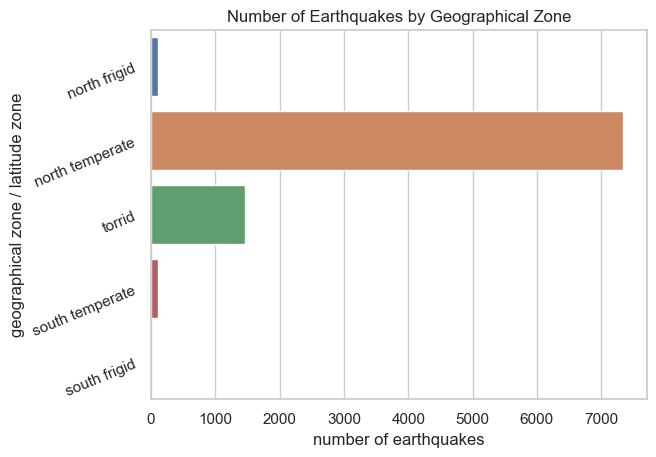

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# reading csv
df = pd.read_csv("earthquakes.csv")

# giving each earthquake a latitude/geographical zone
Z = ["north frigid", "north temperate", "torrid", "south temperate", "south frigid"]
def latzone(value):
  if value > 66.5:
    return Z[0]
  if 23.5 < value <= 66.5:
    return Z[1]
  if -23.5 <= value <= 23.5:
    return Z[2]
  if -66.5 <= value < -23.5:
    return Z[3]
  if value < 66.5:
    return Z[4]
df["latitude zone"] = df["latitude"].apply(latzone)

# ordering the df by latitude zone so that the values are over the correct xticks
df["latitude zone"] = pd.CategoricalIndex(df["latitude zone"], ordered=True, categories=Z)

# checking how many earthquakes in each ZONE to check that values are over the correct xticks
df["latitude zone"].value_counts()

# creating a bar chart -- ZONE
y_axis = np.arange(len(Z)) 
sns.countplot(df, y = "latitude zone", palette="deep")
plt.title("Number of Earthquakes by Geographical Zone")
plt.xlabel("number of earthquakes")
plt.ylabel("geographical zone / latitude zone")
plt.yticks(y_axis, Z, rotation=22.5) 
